# Data Exploration

The first step in any Machine Learning pipeline is to get an idea of the data we are going to work with, and its properties. To do so we will use **pandas** library. 
For visualizations instead, we will exploit **matplotlib** and **seaborn** libraries

In [1]:
import pandas as pd
df = pd.read_csv("../dataset/online_shoppers_intention.csv")

## Features description

Our dataset is composed of 10 Numerical and 8 Categorical Features:

### Numerical Features

| Name | Description |
|------|-------------|
|**Administrative(_Duration)**|Number of account management pages visited by the user (and total time spent on those pages)|
|**Informational(_Duration)**|Number of account information pages visited by the user (and total time spent on those pages)|
|**ProductRelated(_Duration)**|Number of times the user visited a product related page (and the relative duration of the session)|
|**BounceRates**|Average bounce rate of the pages visited by the user (Percentage of users who enter the sate from that page and then leave without triggering any other request)|
|**ExitRates**|Average exit rate of the pages visited by the user (Percentage of users that saw that page as the last of the session)|
|**PageValues**|Average page value of the pages visited by the user (Indicates how much is a web page worth in money)|
|**SpecialDay**|Closeness of the visit time to a special day (e.g., Mother's Day, Prime Day)|

In [2]:
numerical_columns = ["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration","BounceRates","ExitRates","PageValues","SpecialDay"]
df[numerical_columns].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


### Categorical Features

| Name | Description |
|------|-------------|
|**OperatingSystem**|Operating system of the user|
|**Browser**|Browser of the user|
|**Region**|Geographic location of the user|
|**TrafficType**|Source traffic type that brought the user to the website|
|**VisitorType**|Whether the user is "new", "returning" or "other"|
|**Weekend**|Flag that raises if the visit date is a weekend|
|**Month**|Month of the visit date|
|**Revenue**|**TARGET** - Flag that raises if the session finished with a transaction|

The table below shows the amount of unique values for each categorical column

In [3]:
categorical_columns = ["OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend", "Month", "Revenue"]
pd.DataFrame(df[categorical_columns].nunique(), columns=["Uniques"]).transpose()


,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Month,Revenue
Uniques,8,13,9,20,3,2,10,2


## Missing values

In [4]:
pd.DataFrame(df.isnull().sum(), columns=["Missings"]).transpose()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Missings,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Lucky for us, we do not have to deal with any missing value.

## Outliers & Density

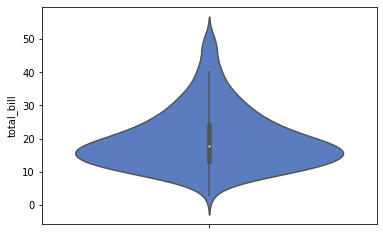

In [5]:
import seaborn as sns

tips = sns.load_dataset("tips")
ax = sns.violinplot(y="total_bill", hue='smoker',
                    data=tips, palette="muted")

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

fig, ax = plt.subplots(3, 3, figsize=(9, 12))
ax = ax.ravel()

df["all"] = 1
for i, col in enumerate(numerical_columns):
    
    # Special day is actually discrete
    if col != "SpecialDay":
        sns.violinplot(data=df, x='all', y=col, ax=ax[i], hue="Revenue", , split=True)
        ax[i].set_title(col)

        ax[i].axes.get_xaxis().set_visible(False)
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (<ipython-input-6-0576e5cd07b4>, line 13)

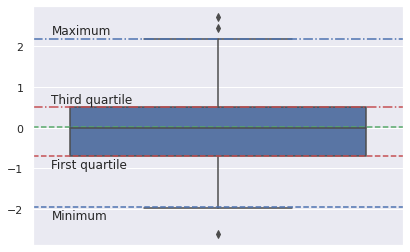

In [118]:
import numpy as np


np.random.seed(42)
x = np.random.normal(loc=0.0, scale=1.0, size=200)

fig, ax = plt.subplots(1, 1)
plt.tight_layout()

sns.boxplot(y=x, ax=ax, whis=1.5)

# Median and quartiles
med = sorted(x)[len(x)//2]
fq = sorted(x)[len(x)//4]
tq = sorted(x)[len(x)//4*3]

# Inter-quaritles range
iqr = tq - fq

# Minimum and maximum
mmin = sorted(x)[int(np.floor(tq + iqr*1.5))]
mmax = sorted(x)[int(np.floor(fq - iqr*1.5))]


ax.axhline(fq, ls='--', color='r', label='First quartile')
ax.text(-0.45, fq - 0.3, "First quartile", fontsize=12)
ax.axhline(tq, ls='-.', color='r', label='Third quartile')
ax.text(-0.45, tq + 0.1, "Third quartile", fontsize=12)


ax.axhline(med, ls='--', color='g', label='Median')

ax.axhline(mmin, ls='--', color='b', label='Minimum')
ax.text(-0.45, mmin - 0.3, "Minimum", fontsize=12)
ax.axhline(mmax, ls='-.', color='b', label='Maximum')
ax.text(-0.45, mmax + 0.1, "Maximum", fontsize=12)

# plt.legend()

plt.show()

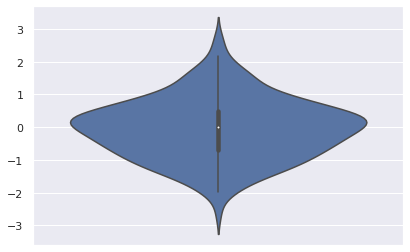

In [119]:
import numpy as np


np.random.seed(42)
x = np.random.normal(loc=0.0, scale=1.0, size=200)

fig, ax = plt.subplots(1, 1)
plt.tight_layout()

sns.violinplot(y=x, ax=ax, whis=1.5)


plt.show()

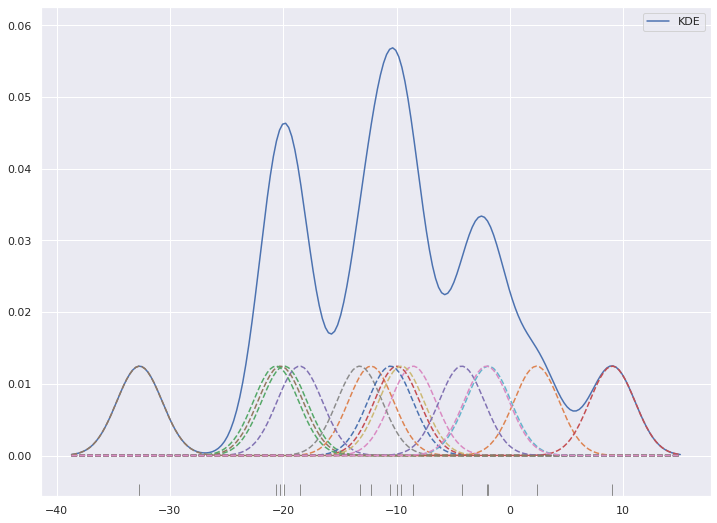

In [120]:
from scipy.stats import norm
import scipy as sp

sns.set_theme()

# generate sample data
np.random.seed(42)

data = []
underlying_distrib = np.random.normal(-10, 7, 300)
data.extend(np.random.choice(underlying_distrib[:150], 8))
data.extend(np.random.choice(underlying_distrib[-150:], 8))

width=2
samples = 200

# grid points
xmin = min(data) - 3 * width
xmax = max(data) + 3 * width
x = np.linspace(xmin, xmax, samples)

# compute KDE by hand
kde = np.zeros(samples)

kdes = []
for val in data:
    kdes.append(norm.pdf(x, loc=val, scale=width))
kde = np.sum(kdes, axis=0)

# normalize
norm_fact = sp.integrate.simps(kde, x)
kde /= norm_fact

# plot computed kde
plt.figure(figsize=(12, 9))
ax = sns.lineplot(x=x, y=kde, label="KDE")

# plot single kernels
for kd in kdes:
    sns.lineplot(x=x, y=kd/norm_fact, ax=ax, palette="Paired")
    
for line in ax.lines[1:]:
    line.set_linestyle("--")
    
# plot sample data
sns.rugplot(data, ax=ax, palette="Paired")

plt.legend();
plt.show()

## Correlation

In [121]:
corr = df[numerical_columns].corr()

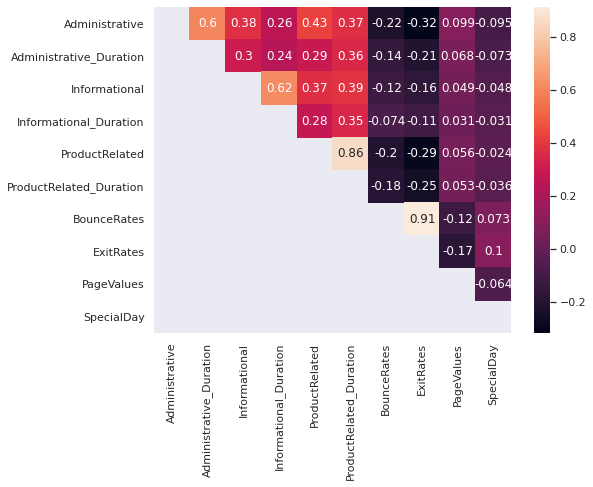

In [122]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

upper_mask = np.zeros_like(corr)
upper_mask[np.tril_indices_from(upper_mask)] = True

ax = sns.heatmap(corr, mask=upper_mask, annot=True)

plt.show()

In [123]:
numerical_columns = ["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration","BounceRates","ExitRates","PageValues"]
# sns.pairplot(df[numerical_columns])

In [124]:
from scipy.stats import chi2_contingency, chi2
from sklearn.preprocessing import OrdinalEncoder
from itertools import product

categorical_columns = ["OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend", "Month", "Revenue"]
to_be_encoded = ["VisitorType", "Weekend", "Month", "Revenue"]
encoder = OrdinalEncoder()
df[to_be_encoded] = encoder.fit_transform(df[to_be_encoded])



In [125]:
data_crosstab = pd.crosstab(df['VisitorType'], df['Weekend'])

In [126]:
data_crosstab

Weekend,0.0,1.0
VisitorType,,
0.0,1215,479
1.0,78,7
2.0,8169,2382


In [127]:
chi, p, dof, expected = chi2_contingency(data_crosstab)

In [128]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(chi) >= critical:
    print(f'Dependent (reject H0)')
else:
    print(f'Independent (fail to reject H0)')

Dependent (reject H0)


In [129]:
df_fake = pd.DataFrame(columns=["shoes", "podium"])

np.random.seed(42)
samples = 1000

shoes = [1, 2, 3]
podium = [1, 2, 3, 0]
podium_rigged_good = [1, 2, 3, 0] * 3 + [1]
podium_rigged_bad = [1, 2, 3, 0] * 3 + [0]
for i in range(samples):
    
    shoe = np.random.choice(shoes)
    if shoe == 1:
        pos = np.random.choice(podium_rigged_good)
    elif shoe == 2:
        pos = np.random.choice(podium_rigged_bad)
    else:
        pos = np.random.choice(podium)
        
    df_fake = df_fake.append({'shoes': shoe, 'podium': pos}, ignore_index=True)
    
crosstab = pd.crosstab(df_fake['shoes'], df_fake['podium'])
crosstab

podium,0,1,2,3
shoes,,,,
1,89,124,71,75
2,98,69,70,89
3,74,75,78,88


In [130]:
chi_stat, p, dof, expected = chi2_contingency(crosstab)

prob = 0.95
critical = chi2.ppf(prob, dof)
print(chi_stat, p, critical, dof, expected)

22.05065666801326 0.0011855436260256949 12.591587243743977 6 [[93.699 96.212 78.621 90.468]
 [85.086 87.368 71.394 82.152]
 [82.215 84.42  68.985 79.38 ]]


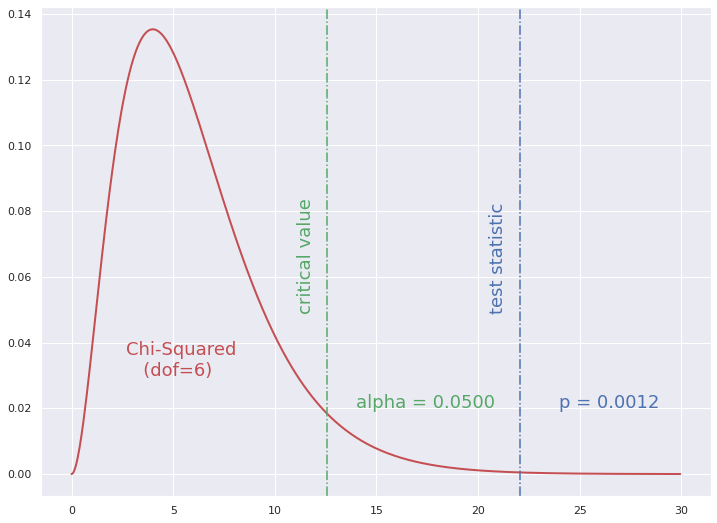

In [131]:

plt.figure(figsize=(12, 9))
x = np.arange(0, 30, .05)
ax = sns.lineplot(x=x, y=chi2.pdf(x, df=np.prod(crosstab.shape) - np.sum(crosstab.shape) + 1), color='r', lw=2)
ax.text(2.7, 0.03, f'Chi-Squared\n   (dof={dof})', fontsize=18, color='r')

ax.axvline(chi_stat, ls='-.', color='b', label='test-statistic')
ax.text(chi_stat-1.5, 0.05, "test statistic", fontsize=18, rotation='vertical', color='b')
ax.text(14, 0.02, f"alpha = {1-prob:.4f}", fontsize=18, color='g')

ax.axvline(critical, ls='-.', color='g', label='critical-value')
ax.text(critical-1.5, 0.05, "critical value", fontsize=18, rotation='vertical', color='g')
ax.text(24, 0.02, f"p = {p:.4f}", fontsize=18, color='b')
plt.show()

In [132]:
if abs(chi_stat) >= critical:
    print(f'Dependent (reject H0)')
else:
    print(f'Independent (fail to reject H0)')


Dependent (reject H0)


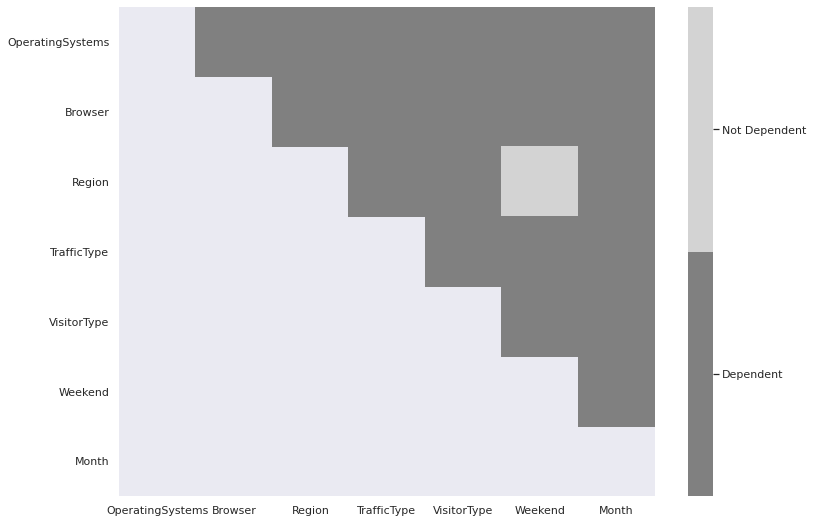

In [133]:
from matplotlib.colors import LinearSegmentedColormap

dep = []
categorical_columns=["OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend", "Month"]


# Define colors
colors = ["gray", "lightgray"] 
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

for i, (c1, c2) in enumerate(product(categorical_columns, repeat=2)):
    
    # Build contingency table
    crosstab = pd.crosstab(df[c1], df[c2])
    
    # Compute the test statistic
    chi, p, dof, expected = chi2_contingency(crosstab)
    
    # interpret test-statistic
    prob = 0.99
    critical = chi2.ppf(prob, dof)
    
    if abs(chi) >= critical:
        dep.append(0)
    else:
        dep.append(1)

# reshape the list to get a heatmap
indep = np.array(dep).reshape((len(categorical_columns), len(categorical_columns)))

# draw the heatmap
plt.figure(figsize=(12, 9))
upper_mask = np.zeros_like(indep)
upper_mask[np.tril_indices_from(upper_mask)] = True
ax = sns.heatmap(indep, xticklabels=categorical_columns, yticklabels=categorical_columns, mask=upper_mask, cmap=cmap)

# Set the colorbar labels
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25,0.75])
colorbar.set_ticklabels(['Dependent', 'Not Dependent'])

plt.show()

In [134]:
indep = np.array(dep).reshape((len(categorical_columns), len(categorical_columns)))

<AxesSubplot:>

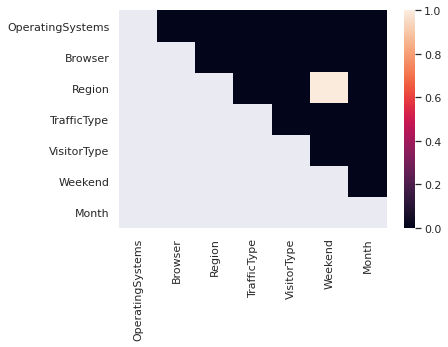

In [135]:
upper_mask = np.zeros_like(indep)
upper_mask[np.tril_indices_from(upper_mask)] = True

sns.heatmap(indep, xticklabels=categorical_columns, yticklabels=categorical_columns, mask=upper_mask)

## Class imbalance

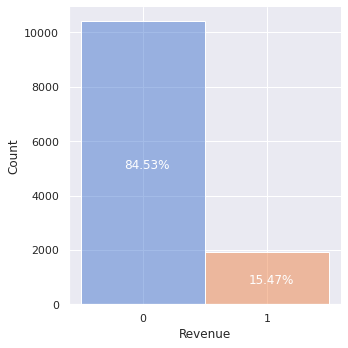

In [152]:
df['Revenue_str'] = df['Revenue'].astype('int').astype('str')

fg = sns.displot(x='Revenue_str' ,data=df, discrete=True, bins=[0, 1], hue='Revenue_str', legend=False, palette="muted")
fg.axes[0][0].text(-0.15, df['Revenue'].eq(0).sum()//2-200, f"{df['Revenue'].eq(0).sum()*100/df.shape[0]:.2f}%", fontsize=12, color='w')
fg.axes[0][0].text(1-0.15, df['Revenue'].eq(1).sum()//2-200, f"{df['Revenue'].eq(1).sum()*100/df.shape[0]:.2f}%", fontsize=12, color='w')
fg.axes[0][0].set_xlabel('Revenue')
plt.tight_layout()
plt.show()
df.drop(columns='Revenue_str');